In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as sci

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
allData_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
allData_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
city_groupby = allData_df.groupby(["city", "driver_count", "type"])


In [3]:
#get data
avgFare = city_groupby["fare"].mean()
avgFare = pd.DataFrame(avgFare)
avgFare["ride_count"] = pd.DataFrame(city_groupby["ride_id"].count())

avgFare = avgFare.rename(columns={"fare":"avg_fare"})
avgFare = avgFare.reset_index()
avgFare.head()

,city,driver_count,type,avg_fare,ride_count
0,Amandaburgh,12,Urban,24.641667,18
1,Barajasview,26,Urban,25.332273,22
2,Barronchester,11,Suburban,36.422500,16
3,Bethanyland,22,Suburban,32.956111,18
4,Bradshawfurt,7,Rural,40.064000,10


## Bubble Plot of Ride Sharing Data

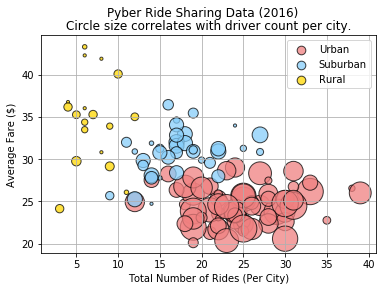

<Figure size 432x288 with 0 Axes>

In [4]:
#define city types
rural = avgFare.loc[avgFare['type'] == 'Rural']
urban = avgFare.loc[avgFare['type'] == 'Urban']
suburban = avgFare.loc[avgFare['type'] == 'Suburban']
fig, ax = plt.subplots(sharex=True)

#Build Scater plots for each of three city types
urban.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare', grid=True, s=urban.driver_count*10, 
              c='lightcoral', ax=ax, label='Urban', alpha=0.75, edgecolors='black',linewidth=1)
suburban.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare', grid=True, s=suburban.driver_count*10,
                 c='lightskyblue', ax=ax,label = 'Suburban',alpha = 0.75, edgecolors='black',linewidth=1)
rural.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare', grid=True, s=rural.driver_count*10,
              c='gold', ax=ax, label = 'Rural',alpha=0.75, edgecolors='black',linewidth=1)

#labels and legend
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.title('Circle size correlates with driver count per city.')
plt.legend(loc='best',title='City Types')
plt.savefig('HW5_Plot.png')
lgnd = plt.legend(loc="best")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.show()

# Save Figure
plt.savefig("Ride Sharing Data.png")


## Total Fares by City Type

In [5]:
#Create Pie Charts
pieChart_df = allData_df[["type", "fare", "driver_count", "ride_id"]]

#groupby Pie yum
pieGroup_df = pieChart_df.groupby("type")

# Calculate Percents
pieRides_df = pd.DataFrame(pieGroup_df['ride_id'].count())
pieRides_df = pieRides_df.reset_index()
pieRides_df = pieRides_df.rename(columns={'ride_id':'Total Rides Taken'})

pieDrivers_df = pd.DataFrame(pieGroup_df['driver_count'].sum())
pieDrivers_df = pieDrivers_df.reset_index()
pieDrivers_df = pieDrivers_df.rename(columns={'driver_count':'Pyber Drivers'})

pieFares_df = pd.DataFrame(pieGroup_df['fare'].sum())
pieFares_df = pieFares_df.reset_index()
pieFares_df = pieFares_df.rename(columns={'fare':'Total Fares'})


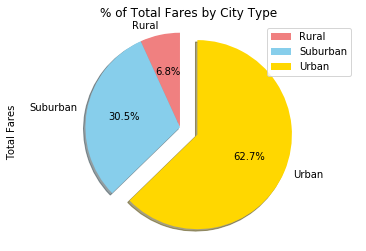

In [6]:
# Build Pie Chart
pieFares_df.plot(kind='pie',y='Total Fares',labels=pieRides_df['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=90, colors = ['lightcoral','skyblue','gold'],
                  title = '% of Total Fares by City Type')

plt.axis('equal')
plt.show()
# Save Figure
#plt.savefig("Fares by City Type pie.png")

## Total Rides by City Type

(-1.108701290042968, 1.282726948490841, -1.22689733822717, 1.10604273039177)

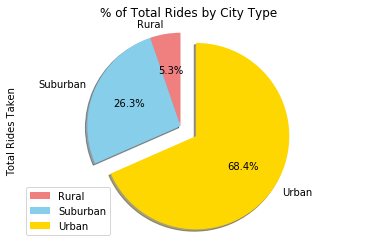

In [7]:
#build pie chart
pieRides_df.plot(kind='pie',y='Total Rides Taken',labels=pieRides_df['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=90, colors = ['lightcoral','skyblue','gold'], 
                title = '% of Total Rides by City Type')
plt.axis('equal')

# Save Figure
#plt.savefig("Percent of Total Rides by City Type.png")

## Total Drivers by City Type

(-1.0245046646225273,
 1.1877233186836815,
 -1.298089241692271,
 1.1094328210329654)

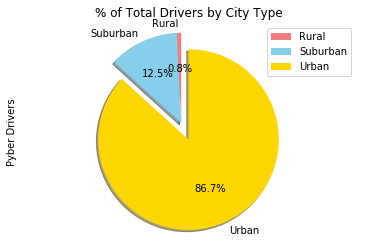

In [8]:
# Build Pie Charts
pieDrivers_df.plot(kind='pie',y='Pyber Drivers',labels=pieDrivers_df['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=90, colors = ['lightcoral','skyblue','gold'],
                  title = '% of Total Drivers by City Type')
plt.axis('equal')

# Save Figure
#plt.savefig("Percent of Total Drivers by City Type.png")